Utilizando los datos proporcionados en el archivo CSV ([enlace de descarga](https://data.insideairbnb.com/spain/islas-baleares/menorca/2024-06-30/data/listings.csv.gz)) obtenga los siguientes datos para las variables `price` y `number_of_reviews`, separando los que tienen licencia de los que no.

In [75]:
# Import required libraries and load data from url
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://data.insideairbnb.com/spain/islas-baleares/menorca/2024-06-30/visualisations/listings.csv')

# Filter data by licensed or not
licensed = data[data['license'].notna()]
licensed['price'] = licensed['price'].fillna(0) # Fill NaN values with 0 -> Comment this line if not needed
licensed['number_of_reviews'] = licensed['number_of_reviews'].fillna(0) # Fill NaN values with 0 -> Comment this line if not needed
unlicensed = data[data['license'].isna()]
unlicensed['price'] = unlicensed['price'].fillna(0) # Fill NaN values with 0 -> Comment this line if not needed
unlicensed['number_of_reviews'] = unlicensed['number_of_reviews'].fillna(0) # Fill NaN values with 0 -> Comment this line if not needed

/tmp/ipykernel_146546/3774132668.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  licensed['price'] = licensed['price'].fillna(0) # Fill NaN values with 0 -> Comment this line if not needed
/tmp/ipykernel_146546/3774132668.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  licensed['number_of_reviews'] = licensed['number_of_reviews'].fillna(0) # Fill NaN values with 0 -> Comment this line if not needed
/tmp/ipykernel_146546/3774132668.py:13: SettingWithCopyWarning: 
A value is trying to be set on a co

### 1 - Mínimo y máximo para cada variable y mostrar los datos en un histograma.

-- Licensed --
-> Price:
MAX: 2336.0 - MIN: 0.0
-> Number of reviews:
MAX: 356 - MIN: 0
-- Unlicensed --
-> Price:
MAX: 9999.0 - MIN: 0.0
-> Number of reviews:
MAX: 289 - MIN: 0


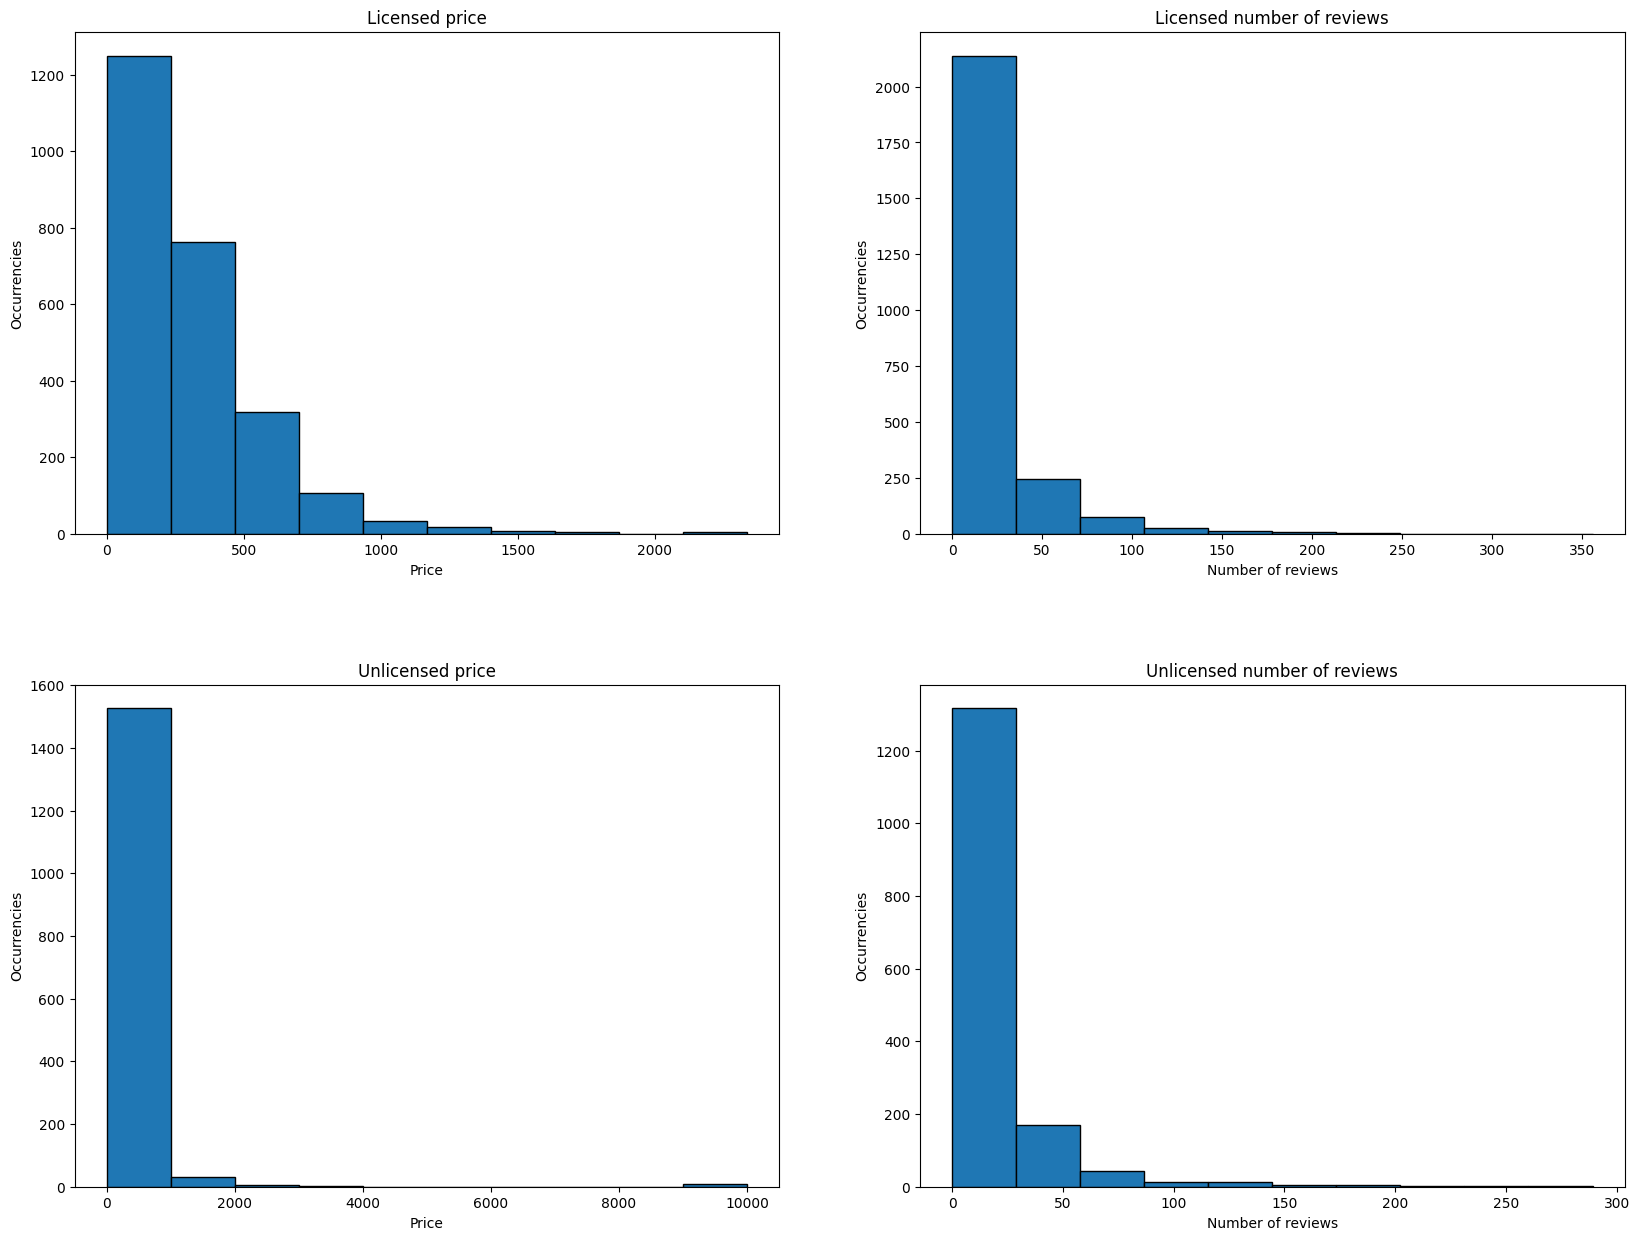

In [76]:
# Set plot/figure properties
min_max_fig = plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.3)
min_max_fig.set_figheight(15)

# LICENSED #
print('-- Licensed --')
# Using python's core functions
""" print(f'MAX(price): {max(licensed['price'])} - MIN(price): {min(licensed['price'])}')
print(f'MAX(number_of_reviews): {max(licensed['number_of_reviews'])} - MIN(number_of_reviews): {min(licensed['number_of_reviews'])}') """
# Using panda's methods: 
print('-> Price:')
print(f'MAX: {licensed['price'].max()} - MIN: {licensed['price'].min()}')
lprice_subfig = min_max_fig.add_subplot(2,2,1)
lprice_subfig.set_title('Licensed price')
lprice_subfig.set_xlabel('Price')
lprice_subfig.set_ylabel('Occurrencies')
lprice_subfig.hist(licensed['price'], edgecolor='black')


print('-> Number of reviews:')
print(f'MAX: {licensed['number_of_reviews'].max()} - MIN: {licensed['number_of_reviews'].min()}')
lreviews_subfig = min_max_fig.add_subplot(2,2,2)
lreviews_subfig.set_title('Licensed number of reviews')
lreviews_subfig.set_xlabel('Number of reviews')
lreviews_subfig.set_ylabel('Occurrencies')
lreviews_subfig.hist(licensed['number_of_reviews'], edgecolor='black')

# UNLICENSED #
print('-- Unlicensed --')
print('-> Price:')
print(f'MAX: {unlicensed['price'].max()} - MIN: {unlicensed['price'].min()}')
uprice_subfig = min_max_fig.add_subplot(2,2,3)
uprice_subfig.set_title('Unlicensed price')
uprice_subfig.set_xlabel('Price')
uprice_subfig.set_ylabel('Occurrencies')
uprice_subfig.hist(unlicensed['price'], edgecolor='black')
print('-> Number of reviews:')
print(f'MAX: {unlicensed['number_of_reviews'].max()} - MIN: {unlicensed['number_of_reviews'].min()}')
ureviews_subfig = min_max_fig.add_subplot(2,2,4)
ureviews_subfig.set_title('Unlicensed number of reviews')
ureviews_subfig.set_xlabel('Number of reviews')
ureviews_subfig.set_ylabel('Occurrencies')
ureviews_subfig.hist(unlicensed['number_of_reviews'], edgecolor='black')

plt.show()


#### Comentario:

Antes de nada he de mencionar que he considerado que la representación gráfica que se pide se refiere a lo mostrado: un histograma por cada serie de datos para cada variable (`price` y `number_of_reviews`) y para cada tipo de alojamiento (con y sin licencia). Teniendo en cuenta esa interpretación del enunciado, comentaré los resultados.

Comentando primero los datos sobre los precios, se puede observar que la mayor parte de las ocurrencias están cercanas al 0 (o la izquierda de los gráficos). Comparando los datos entre estos dos gráficos, se puede ver que los datos de alojamientos con licencia tiene mucha más variedad en los datos, o dicho de otra forma, los datos de alojamientos sin licencias están más concentrados hacia el 0 o valores bajos. Esto puede deberse a que al mero hecho de no tener licencia sobre el alojamiento. 

Hablando ahora sobre el número de reseñas, la tendencia anterior se repite pero al contrario, a pesar que los datos se repartan de forma similar. El motivo puede ser de nuevo por tener o no licencia. Al tener licencia las personas que alquilen el alojamiento pueden ser más propensas a dejar reseñas que las que alquilan alojamientos que no.

### 2 - Media, moda, mediana y percentiles 25 y 75 de cada variable.

In [77]:
# LICENSED #
print('-- Licensed --')
print('-> Price:')
print(f'Mean: {np.mean(licensed["price"])}')
print(f'Mode: {pd.Series(licensed["price"]).mode()[0]}')
print(f'Median: {np.median(licensed["price"])}')
print(f'25th Percentile: {np.percentile(licensed["price"], 25)}')
print(f'75th Percentile: {np.percentile(licensed["price"], 75)}')
print('-> Number of reviews:')
print(f'Mean: {np.mean(licensed["number_of_reviews"])}')
print(f'Mode: {pd.Series(licensed["number_of_reviews"]).mode()[0]}')
print(f'Median: {np.median(licensed["number_of_reviews"])}')
print(f'25th Percentile: {np.percentile(licensed["number_of_reviews"], 25)}')
print(f'75th Percentile: {np.percentile(licensed["number_of_reviews"], 75)}')

# UNLICENSED #
print('-- Unlicensed --')
print('-> Price:')
print(f'Mean: {np.mean(unlicensed["price"])}')
print(f'Mode: {pd.Series(unlicensed["price"]).mode()[0]}')
print(f'Median: {np.median(unlicensed["price"])}')
print(f'25th Percentile: {np.percentile(unlicensed["price"], 25)}')
print(f'75th Percentile: {np.percentile(unlicensed["price"], 75)}')
print('-> Number of reviews:')
print(f'Mean: {np.mean(unlicensed["number_of_reviews"])}')
print(f'Mode: {pd.Series(unlicensed["number_of_reviews"]).mode()[0]}')
print(f'Median: {np.median(unlicensed["number_of_reviews"])}')
print(f'25th Percentile: {np.percentile(unlicensed["number_of_reviews"], 25)}')
print(f'75th Percentile: {np.percentile(unlicensed["number_of_reviews"], 75)}')

-- Licensed --
-> Price:
Mean: 314.4918294141092
Mode: 0.0
Median: 234.0
25th Percentile: 154.0
75th Percentile: 411.0
-> Number of reviews:
Mean: 17.75528098844161
Mode: 0
Median: 7.0
25th Percentile: 1.0
75th Percentile: 23.0
-- Unlicensed --
-> Price:
Mean: 310.6409929980904
Mode: 0.0
Median: 189.0
25th Percentile: 134.0
75th Percentile: 300.0
-> Number of reviews:
Mean: 15.29662635264163
Mode: 0
Median: 5.0
25th Percentile: 1.0
75th Percentile: 20.0


#### Comentario:

**RECORDAR** que los datos han sido levemente modificados, sustituyendo los valores en `NaN` por `0`. En caso de querer ver los datos íntegros del CSV, comentar las líneas en el primer bloque de código de este notebook.

Hablando en términos generales, los resultados de los métodos estadísticos retornan valores similares, salvando algunos casos cuya diferencia está más acentuada, en todos los valores. Este hecho puede indicar que, indiferentemente de si el alojamiento posee o no licencia, los resultados de la compañía son similares, siendo éste un posible indicativo de estabilidad en la plataforma.

### 3 - Desviación estándar y varianza de cada variable.

In [78]:
# LICENSED #
print('-- Licensed --')
print('-> Price:')
print(f'Standard desviation: {np.std(licensed["price"])}')
print(f'Variance: {np.var(licensed["price"])}')
print('-> Number of reviews:')
print(f'Standard desviation: {np.std(licensed["number_of_reviews"])}')
print(f'Variance: {np.var(licensed["number_of_reviews"])}')

# UNLICENSED #
print('-- Unlicensed --')
print('-> Price:')
print(f'Standard desviation: {np.std(unlicensed["price"])}')
print(f'Variance: {np.var(unlicensed["price"])}')
print('-> Number of reviews:')
print(f'Standard desviation: {np.std(unlicensed["number_of_reviews"])}')
print(f'Variance: {np.var(unlicensed["number_of_reviews"])}')

-- Licensed --
-> Price:
Standard desviation: 253.32139862513822
Variance: 64171.73100139618
-> Number of reviews:
Standard desviation: 28.814256126589456
Variance: 830.2613561286979
-- Unlicensed --
-> Price:
Standard desviation: 737.0894088501854
Variance: 543300.7966391157
-> Number of reviews:
Standard desviation: 26.802787462034424
Variance: 718.3894157349897


#### Comentario:

Analizando los datos obtenidos en este apartado, podemos observar que en ambos casos, el precio tiene una desviación y varianza elevada. Esto indica que los datos son bastante dispersos, notablemente mayor en el caso de los alojamientos sin licencia. Por el contrario, en el número de reseñas, tanto la desviación como la varianza tienen valores relativamente pequeños, lo que indica una mayor concentración de los datos entorno a la media.

### 4 - Gráfico de dispersión para poder analizar si existen relaciones lineales entre las dos variables.

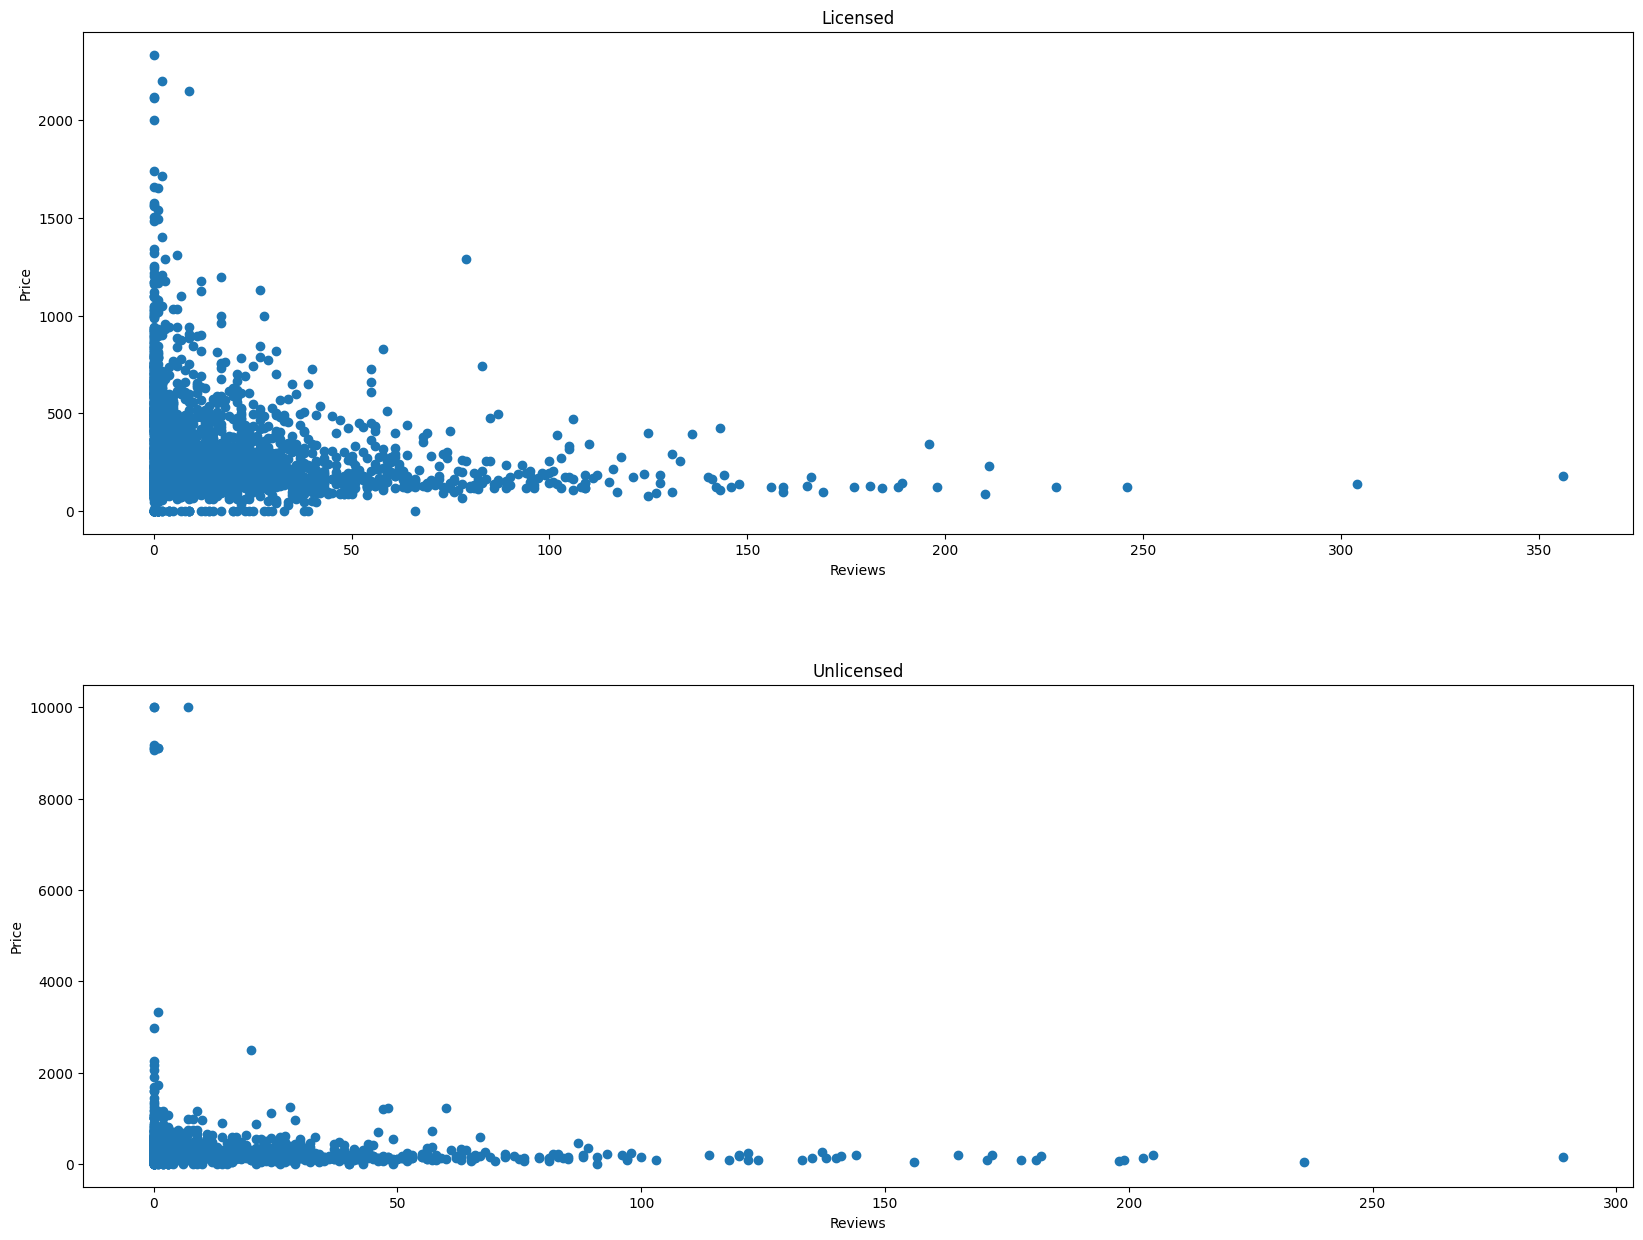

In [79]:
fig = plt.figure(figsize=(20,20)) # define figure to be plotted

licensed_fig = fig.add_subplot(2, 1, 1) # licensed subfigure
unlicensed_fig = fig.add_subplot(2, 1, 2) # unlicensed subfigure
plt.subplots_adjust(hspace=0.3)
fig.set_figheight(15)

# LICENSED #
licensed_fig.set_title('Licensed')
licensed_fig.set_xlabel('Reviews')
licensed_fig.set_ylabel('Price')
licensed_fig.scatter(licensed['number_of_reviews'], licensed['price'])

# UNLICENSED #
unlicensed_fig.set_title('Unlicensed')
unlicensed_fig.set_xlabel('Reviews')
unlicensed_fig.set_ylabel('Price')
unlicensed_fig.scatter(unlicensed['number_of_reviews'], unlicensed['price'])

#### Comentario:

Lo primero que se puede observar es que existe una diferencia notable en la densidad de puntos entre los gráficos, siendo el superior (con licencia) el más denso en cuando a puntos. El motivo de este fenómeno se puede otorgar al mero hecho de tener una licencia sobre el alojamiento, ya que otorga una seguridad al usuario final.

Por otro lado, se puede ver que las concentraciones de puntos en ambos gráficos similares, lo cual es explicativo dado que los resultados en el segundo apartado de este notebook son relativamente parejos. Mencionar pero que la cantidad de reseñas es notablemente mayor en el caso de los alojamientos con licencia.

### 5 - Coeficiente de correlación de Pearson entre las dos variables posibles.

In [80]:
# LICENSED #
print('-- Licensed --')
print(f'-> Correlation coefficient: {licensed['price'].corr(licensed['number_of_reviews'])}')

# UNLICENSED #
print('-- Unlicensed --')
print(f'-> Correlation coefficient: {unlicensed['price'].corr(unlicensed['number_of_reviews'])}')

-- Licensed --
-> Correlation coefficient: -0.20318406363354294
-- Unlicensed --
-> Correlation coefficient: -0.08456978311788618


#### Comentario:

Este coeficiente es una relación entre dos variables que está entre `-1` y `1`, siendo el primero indicativo de una correlación negativa perfecta y el último una correlación perfecta entre las variables. En caso de ser `0`, sería indicativo de que las variables no tienen correlación alguna.

En ambos casos podemos ver que son valores cercanos al `0`, lo que es un indicativo de una correlación débil entre las variables. Ambos son negativos, lo que indica que tienden a que alojamientos con precios más altos tengan menos reseñas.